# Modelo de clasificación de imágenes basado en una red neuronal profunda

Se pide utilizar el dataset que viene precargado en la librería Keras: [CIFAR10](https://keras.io/api/datasets/cifar10/)


1. Importa la librerías Numpy y los módulos necesarios para construir una red neuronal profunda: Sequential, Dense y Flatten.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense

2. Importa el dataset CIFAR10 de Keras, en un conjunto de datos de entrenamiento y un conjunto de datos para test.


In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

3. Explora los datos, especialmente, las dimensiones del dataset. Aplica normalización a los datos de entrada y la técnica one-hot encoding a los de salida. Aplica las funciones necesarias para entender cómo son los datos para poder crear el modelo de forma adecuada y entender también los resultados del entrenamiento.

In [ ]:
# Dimensiones del dataset
print("Dimensiones del conjunto de entrenamiento (imágenes):", X_train.shape)
print("Dimensiones del conjunto de entrenamiento (etiquetas):", y_train.shape)
print("Dimensiones del conjunto de prueba (imágenes):", X_test.shape)
print("Dimensiones del conjunto de prueba (etiquetas):", y_test.shape)

Dimensiones del conjunto de entrenamiento (imágenes): (50000, 32, 32, 3)
Dimensiones del conjunto de entrenamiento (etiquetas): (50000, 1)
Dimensiones del conjunto de prueba (imágenes): (10000, 32, 32, 3)
Dimensiones del conjunto de prueba (etiquetas): (10000, 1)


In [ ]:
# Normalización a los datos de entrada
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Técnica one-hot encoding a los datos de salida
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# Importamos matplotlibt para visualizar las imágenes
import matplotlib.pyplot as plt

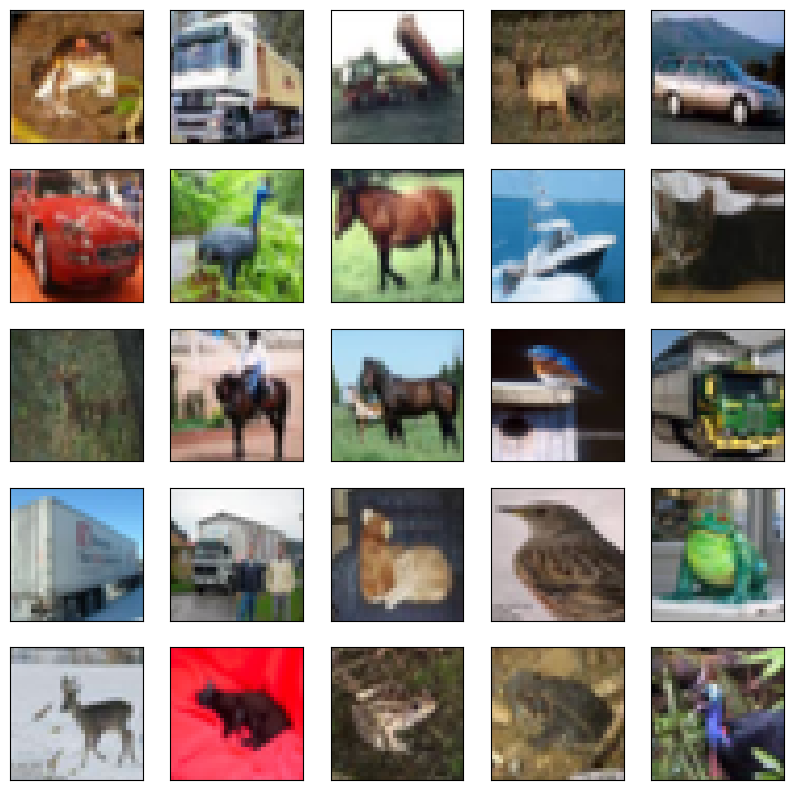

In [ ]:
# Mostramos las imágenes de entrenamiento
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i], cmap = plt.cm.binary)

4. Crea un modelo con la clase Sequential.	Añade el menor número de capas posible, utilizando las clases Dense y Flatten.


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Creamos un modelo secuencial con el menor número de capas
model = keras.Sequential([
   keras.layers.Flatten(input_shape = ((32, 32, 3))),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(10,activation='softmax')
])

5. Configura el entrenamiento utilizando la función compile, con la función loss = 'categorical_crossentropy' y el optimizador Adam. Utiliza la función fit para entrenar el modelo con un máximo de 20 epochs.

In [ ]:
# Entrenamos el modelo
model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.9267 - accuracy: 0.3079
Epoch 2/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.7927 - accuracy: 0.3597
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7484 - accuracy: 0.3761
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7236 - accuracy: 0.3863
Epoch 5/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6971 - accuracy: 0.3966
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6810 - accuracy: 0.4007
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6639 - accuracy: 0.4089
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6559 - accuracy: 0.4101
Epoch 9/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6497 - accuracy: 0.4122
Epoch 10/20
1563/1563 [==============================] - 10s 7ms/step - l

6. Mejora el modelo. Crea un nuevo modelo con más capas y mayor número de neuronas. Entrénalo utilizando un número mayor de epochs y analiza el resultado. ¿Has conseguido mejorar la precisión? haz varias pruebas y quédate con el modelo que mejores resultados da.

In [33]:
# Creamos un modelo con más capas y mayor número de neuronas
model2 = keras.Sequential([
   keras.layers.Flatten(input_shape = ((32, 32, 3))),
   keras.layers.Dense(512, activation='relu'),
   keras.layers.Dense(256, activation='relu'),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(10,activation='softmax')
])

# Compilamos y entrenamos el nuevo modelo con mayor número de epochs
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 41s 26ms/step - loss: 1.8523 - accuracy: 0.3275 - val_loss: 1.7690 - val_accuracy: 0.3679
Epoch 2/30
1563/1563 [==============================] - 38s 24ms/step - loss: 1.6694 - accuracy: 0.4004 - val_loss: 1.6450 - val_accuracy: 0.4142
Epoch 3/30
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5908 - accuracy: 0.4314 - val_loss: 1.5987 - val_accuracy: 0.4220
Epoch 4/30
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5374 - accuracy: 0.4499 - val_loss: 1.5252 - val_accuracy: 0.4491
Epoch 5/30
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4964 - accuracy: 0.4647 - val_loss: 1.5040 - val_accuracy: 0.4696
Epoch 6/30
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4622 - accuracy: 0.4753 - val_loss: 1.4926 - val_accuracy: 0.4686
Epoch 7/30
1563/1563 [==============================] - 40s 26ms/step - loss: 1.4301 - accuracy: 0.4899 - val_loss: 1.4757 -

7. Utiliza el método evaluate para ver la precisión que se alcanzaría con datos nuevos, aplicándolo al conjunto de datos de test. ¿Es muy diferente a la precisión alcanzada en el entrenamiento?

In [34]:
# Comparamos los dos modelos
model.evaluate(X_test, y_test)

model2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.5515 - accuracy: 0.4938


[1.5515166521072388, 0.49380001425743103]

8. Explora de forma visual la precisión que se consigue, representando las primeras 25 imágenes del conjunto de datos de test, y comparando la etiqueta real con la de la predicción.

313/313 [==============================] - 2s 6ms/step


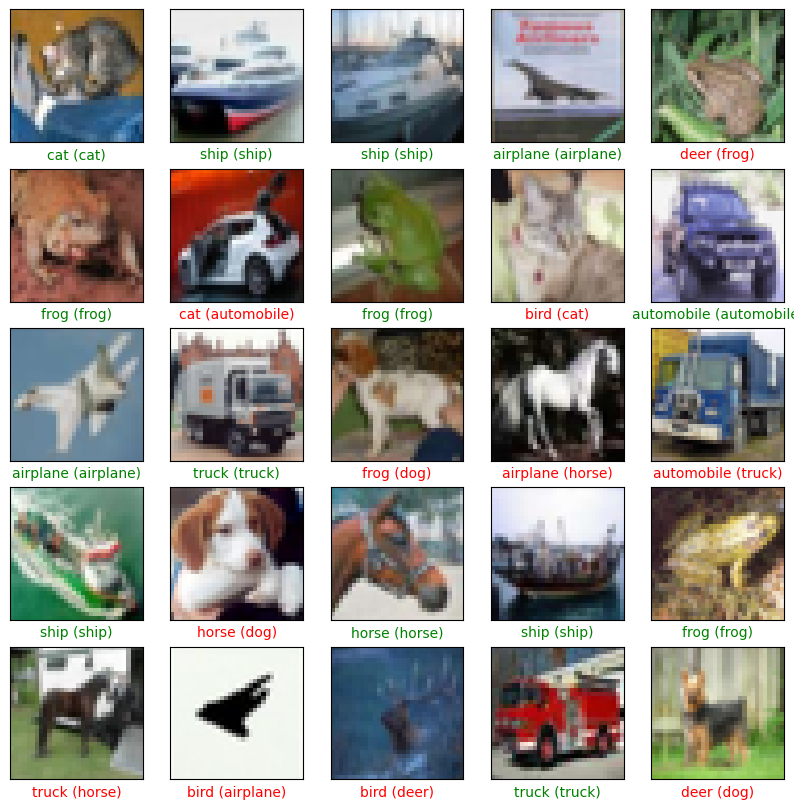

In [35]:
# Mostramos las primeras 25 imagenes del conjunto analizado
predictions = model2.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)